In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

URL = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
title = "Коефіцієнт народжуваності в регіонах України"
dataset = pd.read_html(io=URL, match=title, thousands=".", decimal=",")

print(dataset[0].head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [2]:
print(f"Number of rows {dataset[0].shape[0]} and columns {dataset[0].shape[1]}")

Number of rows 28 and columns 9


In [3]:
dataset[0].replace("—", "NaN", inplace=True)
print(dataset[0].head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


In [4]:
print(dataset[0].dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [5]:
dataset[0]["2014"] = dataset[0]["2014"].astype('float64')
dataset[0]["2019"] = dataset[0]["2019"].astype('float64')
print(dataset[0].dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [6]:
dataset[0].isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [7]:
dataset[0].drop(dataset[0].tail(1).index, inplace=True)
print(dataset[0])

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [8]:
dataset[0].fillna(dataset[0].mean(numeric_only=True), inplace=True)
print(dataset[0].tail())

          Регіон    1950       1960  1970  1990  2000  2012    2014       2019
22     Черкаська  20.500  17.900000  14.4  12.3   7.5  10.0   9.800   6.400000
23   Чернівецька  24.700  21.800000  17.0  14.8  10.1  12.8  12.900   9.200000
24  Чернігівська  22.000  18.300000  12.7  10.8   6.9   9.4   9.000   6.100000
25          Київ  23.104  17.400000  15.9  12.0   7.3  12.0  12.100  11.000000
26   Севастополь  23.104  20.757692  15.6  12.5   7.0  12.0  11.144   8.017391


In [9]:
group_av = dataset[0]['2019'].mean(numeric_only=True)
result = dataset[0][['Регіон', '2019']].groupby('Регіон').filter(lambda x: x['2019'] > group_av)
print(group_av)
print(result)

8.017391304347827
               Регіон  2019
2           Волинська  10.1
6        Закарпатська  10.4
8   Івано-Франківська   8.8
12          Львівська   8.7
14            Одеська   8.8
16         Рівненська  10.7
20         Херсонська   8.1
23        Чернівецька   9.2
25               Київ  11.0


In [10]:
ds3 = dataset[0][['Регіон', '2014']].max().reset_index()
print(ds3)

    index             0
0  Регіон  Чернігівська
1    2014          14.8


<function matplotlib.pyplot.show(close=None, block=None)>

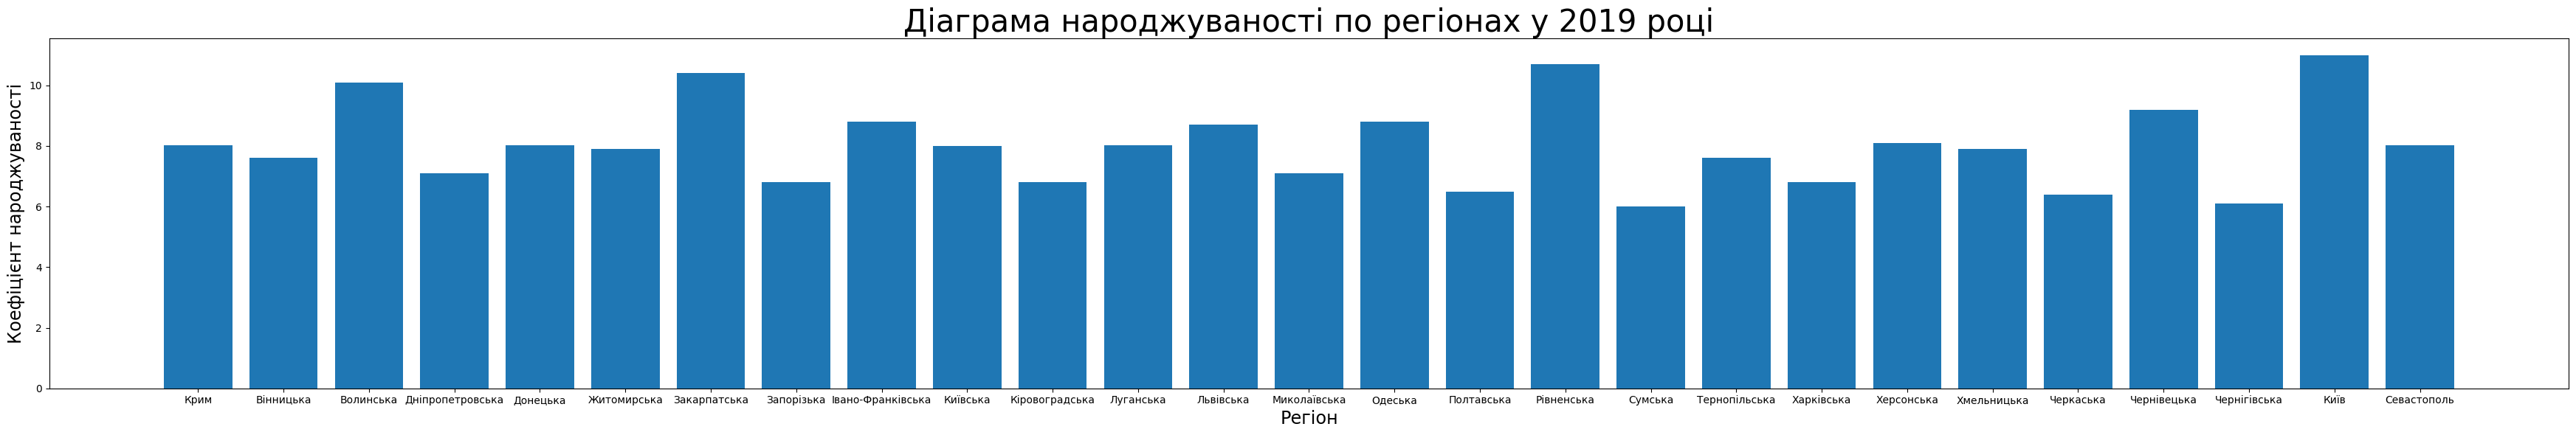

In [41]:
plt.figure(figsize=(35, 6))
plt.bar(dataset[0]['Регіон'], dataset[0]['2019'])
plt.xlabel("Регіон", fontsize="xx-large", color="black")
plt.ylabel("Коефіцієнт народжуваності", fontsize="xx-large", color="black")
plt.title("Діаграма народжуваності по регіонах у 2019 році", fontsize=30)
plt.tight_layout()
plt.show